In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load data
df = pd.read_csv("../data/final_shelters_and_campsites.csv", index_col=0)
df.head()

,place_type,name,capacity,is_free,altitude,country,region,place,latitude,longitude,num_nearby_routes,num_services
0,0,Refugio FUENTE DEL PUERTO,0,0,1724.0,Spain,Aragon,Teruel,40.5081,-1.65051,4,0
1,1,Camping Yolimar,240,0,18.0,Spain,Asturias,Asturias,43.5527,-6.19617,4,0
2,0,Refugio HOYA DE LA MORA,0,0,2524.0,Spain,Andalusia,Granada,37.0941,-3.38409,8,0
3,0,Refugio MONSANT NATURA,32,0,534.0,Spain,Catalonia,Tarragona,41.2648,0.90469,25,0
4,1,Camping San Pedro,0,0,18.0,Spain,Galicia,A Coruña,43.3819,-8.28903,1,0


In [17]:
# Per aquest anàlisi treurem la columna name
df.drop(['name', 'place'], axis=1, inplace=True)

In [18]:
# Tornarem a comprovar que no hi hagi valors nuls
df.isna().sum()
df.isnull().sum()/len(df)*100

place_type           0.000000
capacity             0.000000
is_free              0.000000
altitude             0.815217
country              0.000000
region               0.000000
latitude             0.000000
longitude            0.000000
num_nearby_routes    0.000000
num_services         0.000000
dtype: float64

In [19]:
# Elimino valors nulls (temporal)
df = df.dropna()
df.isnull().sum()

place_type           0
capacity             0
is_free              0
altitude             0
country              0
region               0
latitude             0
longitude            0
num_nearby_routes    0
num_services         0
dtype: int64

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
place_type,1460.0,0.331507,0.470916,0.0000,0.000000,0.00000,1.000000,1.00000
capacity,1460.0,10.823288,24.946611,0.0000,0.000000,4.00000,10.000000,490.00000
is_free,1460.0,0.435616,0.496007,0.0000,0.000000,0.00000,1.000000,1.00000
altitude,1460.0,1146.176027,738.802993,-5.0000,544.750000,1171.50000,1724.250000,3270.00000
latitude,1460.0,41.086337,2.209798,27.9405,40.189000,42.09190,42.643325,43.56220
longitude,1460.0,-1.877961,3.262380,-17.8363,-4.173658,-1.41873,0.636115,3.79623
num_nearby_routes,1460.0,18.698630,21.660053,0.0000,4.000000,11.00000,24.000000,97.00000
num_services,1460.0,0.902055,1.649349,0.0000,0.000000,0.00000,1.000000,12.00000


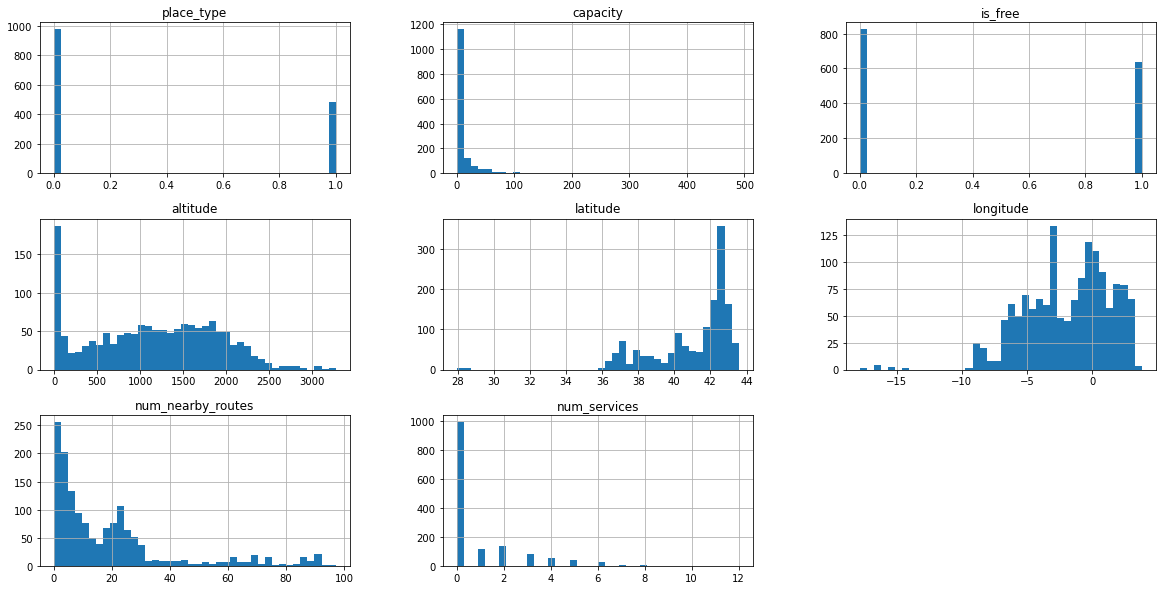

In [21]:
# Histogrames de les variables numèriques amb més de 4 valors
df.hist(bins=40, figsize=(20,10));

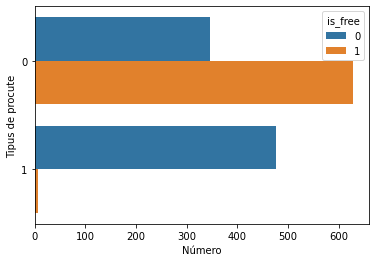

In [22]:
# A continuació visualitzaré quin tipus de producte es compra en cada branca
sns.countplot(y ='place_type', hue = "is_free", data = df) 
plt.xlabel('Número')
plt.ylabel('Tipus de procute')
plt.show()

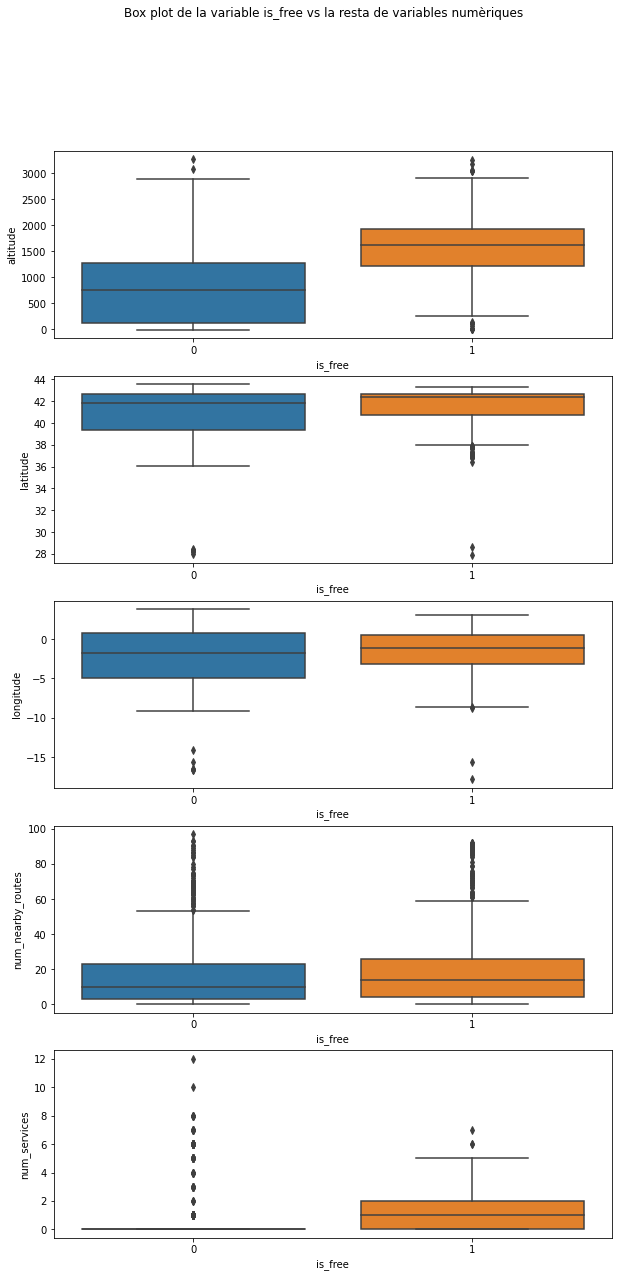

In [23]:
# Boxplot
columns = ['altitude', 'latitude', 'longitude', 'num_nearby_routes', 'num_services']

fig, axes = plt.subplots(5, 1, figsize= (10,20))

fig.suptitle('Box plot de la variable is_free vs la resta de variables numèriques')
for i in range(len(columns)):
    sns.boxplot(ax=axes[i-1], data=df, x='is_free', y=df[columns[i-1]])

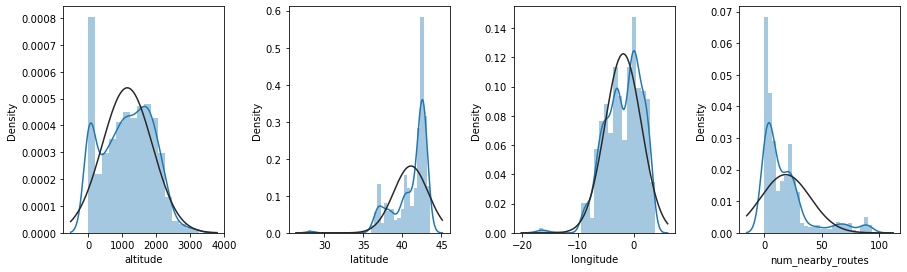

In [24]:
# Test de normalitat
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 5):
    ax = fig.add_subplot(2, 4, i)
    sns.distplot(df[columns[i-1]], fit = norm, ax=ax)

plt.show()

In [27]:
# Transformació logarítmica per tenir unes variables amb unes formes més normals

for col in columns:
    df[col] = np.log1p(df[col])

In [28]:
for i in range(1, 2):
    ax = fig.add_subplot(2, 2, i)
    sns.distplot(df[rest_col[i-1]], fit = norm, ax=ax)

OverflowError: cannot convert float infinity to integer

In [ ]:
# Anàlisi bivariant
sns.set()
sns.pairplot(df[columns], size = 2.5)
plt.show()

In [ ]:
#Anàlisi multivariant
corrmat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [ ]:
#Coeficient de correlació
from scipy.stats import pearsonr
for col in columns:
    corr, _ = pearsonr(df['is_free'], df[col])
    print('Pearsons correlation: %.3f' % corr)

In [ ]:
#Covariance
from numpy import cov
for col in columns:
    covariance = cov(df['is_free'], df[col])
    print("Covariance {0}: {1}".format(col, covariance))

In [ ]:
# Coeficient d'assimetria
for col in columns [1:]:
    print(col + ": ", df[col].skew())

In [ ]:
# Discretització de variables categòriques
# Country: Spain 0, France 1, Andorra 2
df['country'].replace(['Spain','France', 'Andorra'],[0,1,2],inplace=True)
df.head()

In [ ]:
df['region'].replace([' Aragon', ' Asturias', ' Andalusia', ' Catalonia', ' Galicia',
 ' Castile-la mancha', ' Castile and león', ' La rioja',
 ' Valencian community', ' Navarre', ' Community of madrid',
 ' Balearic islands', ' Occitanie', ' Encamp', ' Region of murcia',
 ' Cantabria', ' Basque country', ' Ordino', ' La massana', ' Canary islands',
 ' Canillo', ' Extremadura', ' Escaldes-engordany', ' Nouvelle-aquitaine',
 ' Sant julià de lòria'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],inplace=True)
df.head()

In [ ]:
# Estandarització de les dades
from sklearn.preprocessing import StandardScaler
std_df = df[['capacity',  'altitude','latitude', 'longitude', 'num_nearby_routes', 'num_services']]

scaler = StandardScaler()
std_df[std_df.columns] = scaler.fit_transform(std_df[std_df.columns])
df.head()

In [ ]:
# Regressió logística
# Parteixo les dades
from sklearn.model_selection import train_test_split

X = df.drop('is_free', 1)
y = df.is_free

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Entreno el model
from sklearn import linear_model, datasets

logreg = linear_model.LogisticRegression()
model = logreg.fit(X_train, y_train)

In [ ]:
# Prediccions del model
predicted = model.predict(X_test)
predicted

In [ ]:
# Matriu de confusió

In [ ]:
# Accuracy

In [ ]:
# Precisió

In [ ]:
# Corba de ROC